#Real Incomes and Inequality in the U.S.: A Data Visualization Project

Please import the CSV files:
- Race of Householder-Households by Median Income.csv
- Median Household Income by State.csv
- meanInc.csv
- state_household.csv


##Farida

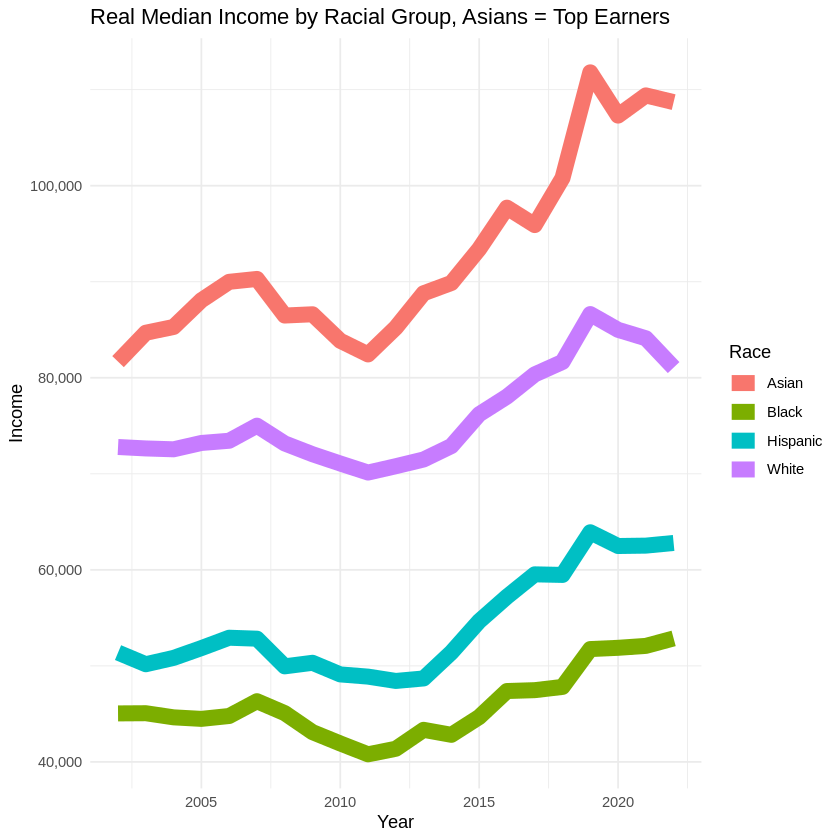

In [70]:
Data = read.csv("Race of Householder-Households by Median Income.csv")
#install.packages("ggplot2")
#install.packages("tidyverse")

library(tidyverse)

library(ggplot2)

data_long <- tidyr::pivot_longer(Data, cols = c(White, Black, Asian, Hispanic),
                                 names_to = "Race", values_to = "Value")

ggplot(data_long, aes(x = Year, y = Value, color = Race)) +
  geom_line(size = 4.5) +

  labs(x = "Year", y = "Income", title = "Real Median Income by Racial Group, Asians = Top Earners") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()




In [71]:
ggsave("z_fig_Farida.svg", width = 22, height = 12, dpi = 1000)

##Brent

In [72]:
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



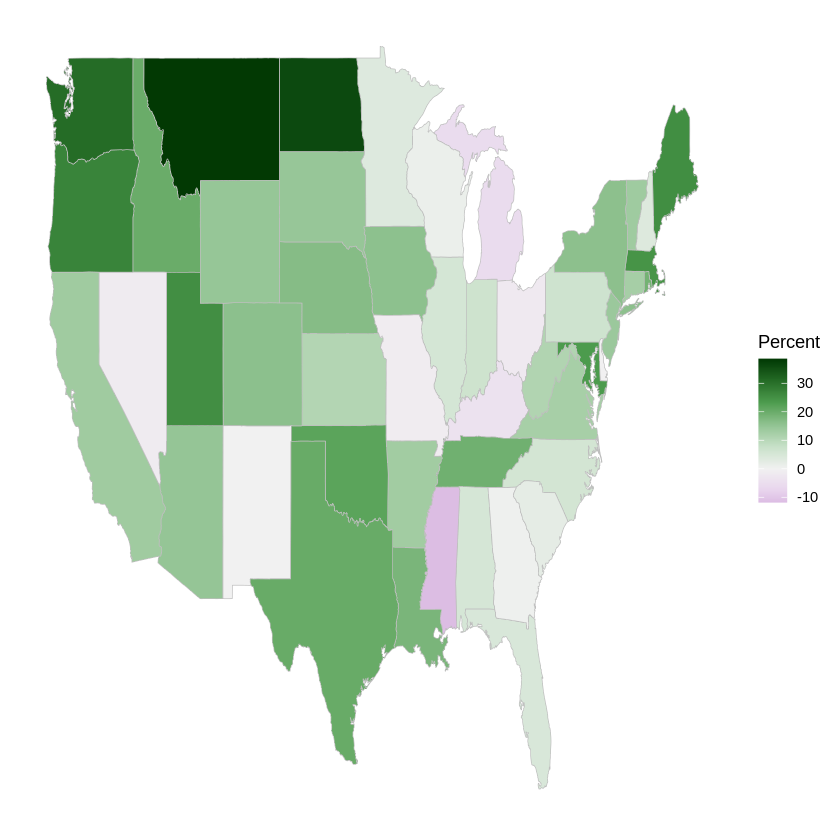

In [73]:
library(maps)
library(ggplot2)
library(colorspace)
library(dplyr)

state_med_income = read.csv("Median Household Income by State.csv")
MainStates <- map_data("state")
colnames(MainStates)[5]  <- "state"
MergedStates <- inner_join(state_med_income, MainStates, by = "state")

g <- ggplot(MergedStates, aes(x=long, y=lat, group=group, fill = pct_chng_frm_2000)) +
  geom_polygon(color="grey", size = 0.2) +
  scale_fill_continuous_diverging(name = 'Percent', palette = "Purple-Green") +
  theme(panel.background = element_rect(fill = "transparent", color = NA),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.title = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank())

g

In [74]:
ggsave("z_fig_Brent.svg", width = 22, height = 12, dpi = 1000)

##Souley

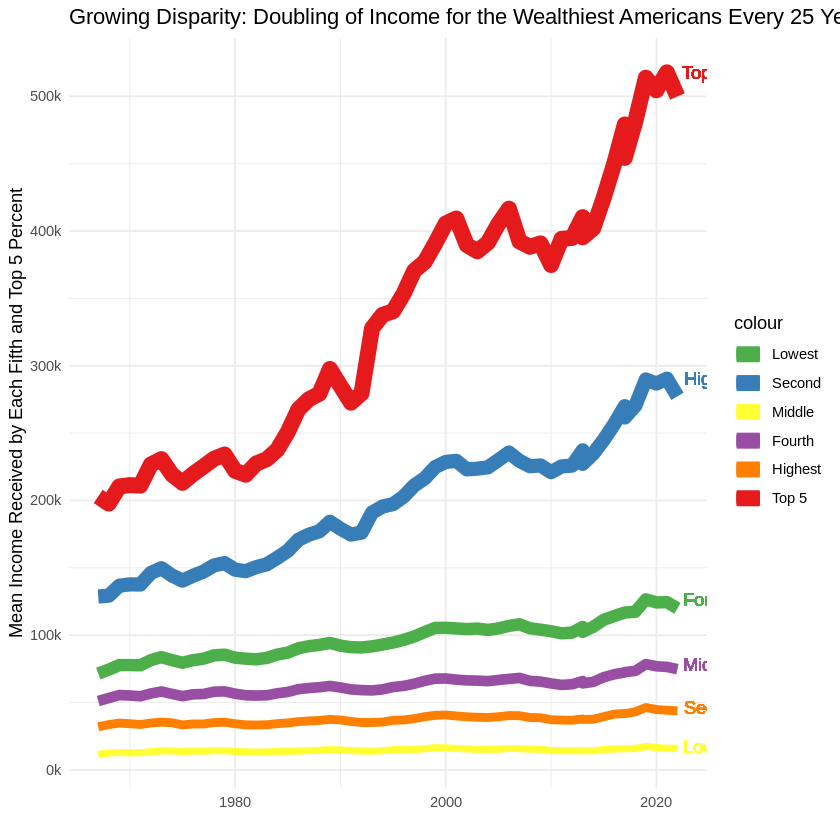

# A tibble: 12 × 5
   term          estimate std.error statistic  p.value
 * <chr>            <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)  13231.     175.         75.5  4.96e-58
 2 Year             0.149    0.0160      9.31 5.67e-13
 3 (Intercept)  33156.     411.         80.7  1.26e-59
 4 Year             0.467    0.0375     12.5  8.62e-18
 5 (Intercept)  53668.     630.         85.3  5.81e-61
 6 Year             0.997    0.0574     17.4  3.23e-24
 7 (Intercept)  76408.     921.         83.0  2.58e-60
 8 Year             2.22     0.0839     26.4  2.76e-33
 9 (Intercept) 129362.    2588.         50.0  3.79e-48
10 Year             7.55     0.236      32.0  1.10e-37
11 (Intercept) 190209.    6066.         31.4  3.29e-37
12 Year            15.6      0.553      28.2  9.63e-35


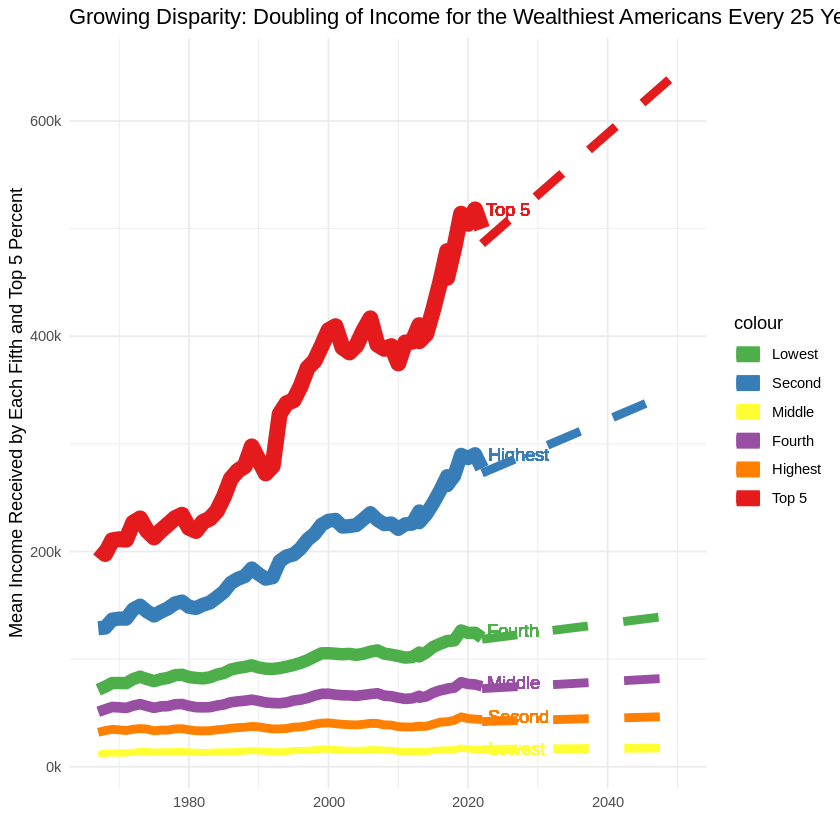

In [66]:
#
#Table representes Mean Income Received by Each Fifth and Top 5 Percent of All Households: 1967 to 2022
#from the 2023 Annual Social and Economic (ASEC) Supplement
#sample of  95,000 households, random mix of Population Characteristics, races, Consumer Income and Geographic
#
#

library(ggplot2)
df <- read.csv("meanInc.csv")

## Remove parentheses and their contents from "year" column
df$Year <- gsub("\\s*\\(.*\\)\\s*", "", df$Year)
df <- slice(df, -1) #remove the first line

library(dplyr)

## Remove commas from all columns
df <- mutate_all(df, function(x) as.numeric(gsub(",", "", x)))
## Convert all columns to numeric
df <- mutate_all(df, as.numeric)
## Convert "year" column to date format
df$Year <- as.Date(paste0(df$Year, "-01-01"))
#head(df)

## Plot the time series
## Plot the data
desired_order <- c("Lowest", "Second", "Middle", "Fourth", "Highest", "Top 5")

library(RColorBrewer)
pal_colors <- brewer.pal(n = 6, name = "Set1")

pal_colors <- rev(pal_colors) #reverse for yellow to be for back -lower earner
now <- ggplot(df, aes(x = Year))+
  geom_line(size = 2.0, aes(y = Lowest, color = "Lowest")) +
  geom_line(size = 2.5, aes(y = Second, color = "Second")) +
  geom_line(size = 3.0, aes(y = Middle, color = "Middle")) +
  geom_line(size = 3.5, aes(y = Fourth, color = "Fourth")) +
  geom_line(size = 4.0, aes(y = Highest, color = "Highest")) +
  geom_line(size = 4.5, aes(y = `Top.5`, color = "Top 5")) +
  #scale_x_continuous(breaks = seq(min(df$Year), max(df$Year), by = 40)) +
  #labs(x = "Year", y = "Value") +
  #scale_color_manual(values = c("blue", "green", "red", "orange", "purple", "black")) +
  scale_color_manual(values = c("Lowest" = pal_colors[1],
                                "Second" = pal_colors[2],
                                "Middle" = pal_colors[3],
                                "Fourth" = pal_colors[4],
                                "Highest" = pal_colors[5],
                                "Top 5" = pal_colors[6]),
                     labels = c("Lowest", "Second", "Middle", "Fourth", "Highest", "Top 5")) +
  scale_y_continuous(labels = function(x) paste0(x/1000, "k")) +
  labs(title = "Growing Disparity: Doubling of Income for the Wealthiest Americans Every 25 Years",
       y = "Mean Income Received by Each Fifth and Top 5 Percent",
       x = "") +

  geom_text(aes(x = max(Year), y = max(Lowest), label = "Lowest"), hjust = -0.1, color = pal_colors[1]) +
  geom_text(aes(x = max(Year), y = max(Second), label = "Second"), hjust = -0.1, color = pal_colors[2]) +
  geom_text(aes(x = max(Year), y = max(Middle), label = "Middle"), hjust = -0.1, color = pal_colors[3]) +
  geom_text(aes(x = max(Year), y = max(Fourth), label = "Fourth"), hjust = -0.1, color = pal_colors[4]) +
  geom_text(aes(x = max(Year), y = max(Highest), label = "Highest"), hjust = -0.1, color = pal_colors[5]) +
  geom_text(aes(x = max(Year), y = max(`Top.5`), label = "Top 5"), hjust = -0.1, color = pal_colors[6]) +

  theme(legend.position = "none") +

  theme(panel.grid = element_line(color = "gray", size = 0.4),
        panel.grid.major.y = element_line(color = "gray", size = 0.4),
        panel.grid.minor = element_blank(),
        axis.text.y = element_text(size = 10),
        axis.title.y = element_text(size = 12),
        plot.title = element_text(size = 14, hjust = 0.5)) +

  theme_minimal()

now






##Future Trend
## Convert "Year" column to proper date format
df$Year <- as.Date(df$Year)

## Create an empty list to store the forecasted data frames for each category
forecast_dfs <- list()

## Iterate over each category and fit a linear regression model
for (category in c("Lowest", "Second", "Middle", "Fourth", "Highest", "Top.5")) {
  ## Fit a linear regression model
  model <- lm(df[[category]] ~ Year, data = df)

  ## Create a new data frame for the forecasted years
  forecast_df <- data.frame(Year = seq(as.Date(max(df$Year)), as.Date("2050-01-01"), by = "year"))

  ## Predict the values for the forecasted years using the model
  forecast_df[[category]] <- predict(model, newdata = forecast_df)

  ## Add the forecasted data frame to the list
  forecast_dfs[[category]] <- forecast_df
}

## Combine all the forecasted data frames into a single data frame
combined_forecast_df <- Reduce(function(x, y) merge(x, y, by = "Year", all = TRUE), forecast_dfs)

## Plot the original data and the forecasted trends for all categories
futur <- now +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = Lowest), color = pal_colors[1], linetype = "dashed") +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = Second), color = pal_colors[2], linetype = "dashed") +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = Middle), color = pal_colors[3], linetype = "dashed") +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = Fourth), color = pal_colors[4], linetype = "dashed") +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = Highest), color = pal_colors[5], linetype = "dashed") +
  geom_line(size = 2.5, data = combined_forecast_df, aes(x = Year, y = `Top.5`), color = pal_colors[6], linetype = "dashed")

futur





library(broom)
df$Year <- as.Date(df$Year)
# Create an empty list to store the regression results
regression_results <- list()

for (variable in c("Lowest", "Second", "Middle", "Fourth", "Highest", "Top.5")) {
  model <- lm(df[[variable]] ~ Year, data = df)
  regression_result <- tidy(model)

  # Add the regression results to the list
  regression_results[[variable]] <- regression_result
}

# Combine all the regression results into a single data frame, and bingo
combined_regression_results <- do.call(rbind, regression_results)
print(combined_regression_results)

#In the pptx:
#Based on the analysis, it can be observed that the income of the first lower fifth in the USA has remained stagnant and is projected to remain unchanged over the next 30 years.​
#Growing disparity between the lower income population and the high earners.​
#In 2023, the highest earners were making approximately 40 times more than the first lower fifth of the population. However, by 2050, this gap is expected to widen to over 40 times. These findings highlight the widening income inequality in the USA over time. ​
#icones bills:
#- https://pixabay.com/vectors/ai-generated-coins-gold-stack-8138052/

In [67]:
ggsave("z_fig_Souley.svg", width = 22, height = 12, dpi = 1000)

##Abhi

`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


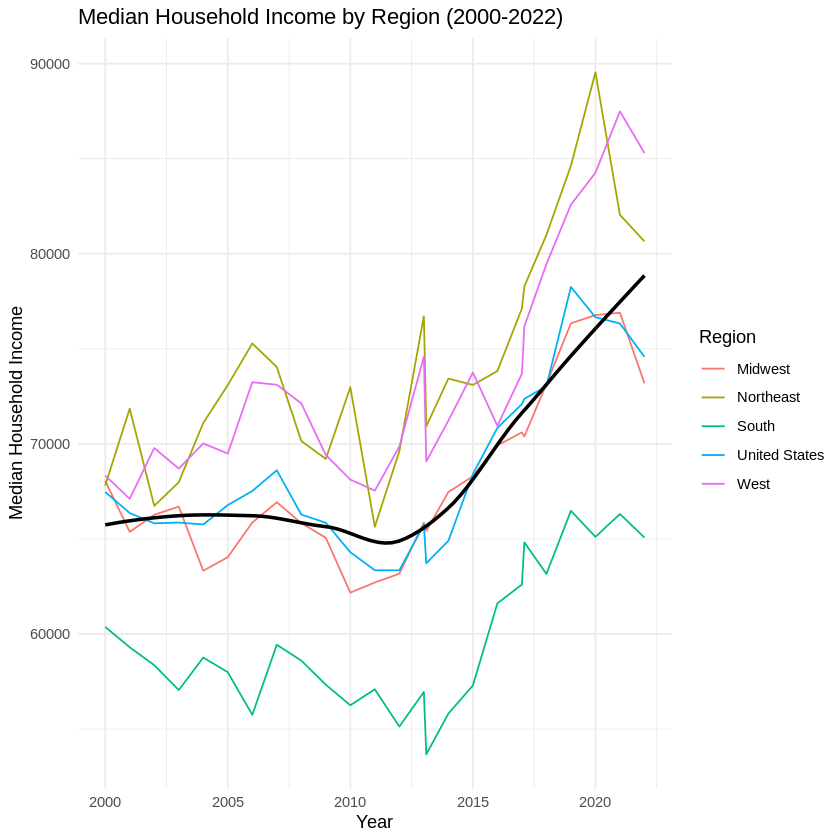

In [68]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Load the data
state_household <- read.csv("state_household.csv")

# Define regions
regions <- list(
  "Northeast" = c("Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"),
  "Midwest" = c("Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"),
  "South" = c("Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"),
  "West" = c("Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"),
  "United States" = "United States"
)

# Convert X2022 to numeric
state_household$X2022 <- as.numeric(as.character(state_household$X2022))

# Add Region column based on State
state_household$Region <- unlist(lapply(state_household$State, function(state) {
  for (region in names(regions)) {
    if (state %in% regions[[region]]) {
      return(region)
    }
  }
}))

# Melt the data to long format
state_household_long <- state_household %>%
  select(State, Region, starts_with("X")) %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "Income")

# Convert Year to numeric
state_household_long$Year <- as.numeric(gsub("X", "", state_household_long$Year))

# Aggregate the data by Region and Year
region_income <- state_household_long %>%
  group_by(Region, Year) %>%
  summarise(Avg_Income = median(Income))

# Calculate the aggregated median household income for all states combined as the United States data
us_aggregated_income <- region_income %>%
  filter(Region != "United States") %>%
  group_by(Year) %>%
  summarise(Avg_Income = median(Avg_Income))

# Plot the line chart with a smoother line
ggplot(region_income, aes(x = Year, y = Avg_Income, color = Region)) +
  geom_line() +
  geom_smooth(method = "loess", se = FALSE, color = "black", aes(group = 1)) + # Add a smoother line
  labs(title = "Median Household Income by Region (2000-2022)",
       x = "Year",
       y = "Median Household Income",
       color = "Region") +
  theme_minimal()

In [69]:
ggsave("z_fig_Abhi.svg", width = 22, height = 12, dpi = 1000)

`geom_smooth()` using formula = 'y ~ x'
